In [533]:
#!conda install -y conda-forge::dlib

In [534]:
from pathlib import Path


path = str(Path().resolve())+"/Images/"

In [535]:
import cv2 as cv
import numpy as np

img = cv.imread(path+"Trump.jpg")
img = cv.resize(img,dsize=(400,500))
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
mask = np.zeros_like(img_gray)

img2 = cv.imread(path+"TheRock.jpg")
img2 = cv.resize(img2,dsize=(400,500))
img2_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

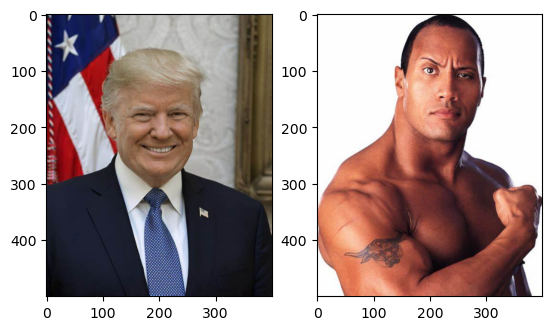

In [536]:
from matplotlib import pyplot as plt

fig, axs = plt.subplots(1,2)
axs[0].imshow(img)
axs[1].imshow(img2)
mask

In [537]:
from mediapipe.python.solutions import drawing_utils as mp_drawing
import mediapipe.python.solutions.face_mesh as mp_faces
from mediapipe.python.solutions import drawing_styles
import data_set as dts

laps=0
listX=dts.TRIANGLE_SET
lista = [listX[i:i+3] for i in range(0, len(listX), 3)]
lista

[[(127, 34), (34, 139), (139, 127)],
 [(11, 0), (0, 37), (37, 11)],
 [(232, 231), (231, 120), (120, 232)],
 [(72, 37), (37, 39), (39, 72)],
 [(128, 121), (121, 47), (47, 128)],
 [(232, 121), (121, 128), (128, 232)],
 [(104, 69), (69, 67), (67, 104)],
 [(175, 171), (171, 148), (148, 175)],
 [(118, 50), (50, 101), (101, 118)],
 [(73, 39), (39, 40), (40, 73)],
 [(9, 151), (151, 108), (108, 9)],
 [(48, 115), (115, 131), (131, 48)],
 [(194, 204), (204, 211), (211, 194)],
 [(74, 40), (40, 185), (185, 74)],
 [(80, 42), (42, 183), (183, 80)],
 [(40, 92), (92, 186), (186, 40)],
 [(230, 229), (229, 118), (118, 230)],
 [(202, 212), (212, 214), (214, 202)],
 [(83, 18), (18, 17), (17, 83)],
 [(76, 61), (61, 146), (146, 76)],
 [(160, 29), (29, 30), (30, 160)],
 [(56, 157), (157, 173), (173, 56)],
 [(106, 204), (204, 194), (194, 106)],
 [(135, 214), (214, 192), (192, 135)],
 [(203, 165), (165, 98), (98, 203)],
 [(21, 71), (71, 68), (68, 21)],
 [(51, 45), (45, 4), (4, 51)],
 [(144, 24), (24, 23), (23,

Multiplicar X e Y por el ancho de la foto

In [538]:
from numpy import isin
import numpy as np



landmarkListImg1=[]
with mp_faces.FaceMesh() as faces:
    results = faces.process(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    for face_landmarks in results.multi_face_landmarks:
        landmarkListImg1 = [x for x in face_landmarks.landmark]

with mp_faces.FaceMesh() as faces:
    results = faces.process(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
    for face_landmarks in results.multi_face_landmarks:
        landmarkListImg2 = [x for x in face_landmarks.landmark]

height, width = img.shape[:2]
img_m = img.copy()
triangulosImg1Marks={}
for valor in lista:
    for tupla in valor:
        x1,y1=landmarkListImg1[tupla[0]].x*width,landmarkListImg1[tupla[0]].y*height
        x2,y2=landmarkListImg1[tupla[1]].x*width,landmarkListImg1[tupla[1]].y*height
        cv.line(img_m, (int(x1),int(y1)), (int(x2),int(y2)), (255,0,0), 1)
        triangulosImg1Marks[tupla[0]]=[x1,y1]
        triangulosImg1Marks[tupla[0]]=[x2,y2]

height, width = img2.shape[:2]
img2_m = img2.copy()
triangulosImg2Marks={}
for valor in lista:
    for tupla in valor:
        x1,y1=landmarkListImg2[tupla[0]].x*width,landmarkListImg2[tupla[0]].y*height
        x2,y2=landmarkListImg2[tupla[1]].x*width,landmarkListImg2[tupla[1]].y*height
        cv.line(img2_m, (int(x1),int(y1)), (int(x2),int(y2)), 255)
        triangulosImg2Marks[tupla[0]]=[x1,y1]
        triangulosImg2Marks[tupla[0]]=[x2,y2]


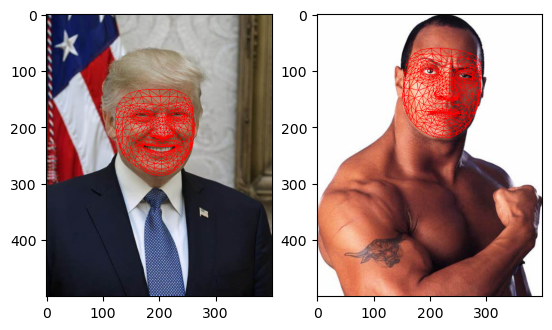

In [539]:
fig, axs = plt.subplots(1,2)
axs[0].imshow(img_m)
axs[1].imshow(img2_m)

In [540]:
def extract_index_nparray(nparray):
    index = None
    for num in nparray[0]:
        index = num
        break
    return index

In [541]:
triangles=[]
for t in lista:
    pt1 = (t[0][0], t[0][1])
    pt2 = (t[1][0], t[1][1])
    pt3 = (t[2][0], t[2][1])
    value = list(set([pt1[0],pt1[1],pt2[0],pt2[1],pt3[0],pt3[1]]))
    

    triangles.append(value)
print(triangles)

[[34, 139, 127], [0, 11, 37], [232, 120, 231], [72, 37, 39], [128, 121, 47], [232, 121, 128], [104, 67, 69], [171, 148, 175], [50, 101, 118], [40, 73, 39], [9, 108, 151], [48, 115, 131], [194, 211, 204], [40, 185, 74], [80, 42, 183], [40, 186, 92], [118, 229, 230], [202, 212, 214], [17, 18, 83], [146, 76, 61], [160, 29, 30], [56, 157, 173], [194, 106, 204], [192, 214, 135], [98, 203, 165], [68, 21, 71], [51, 4, 45], [144, 24, 23], [146, 91, 77], [50, 187, 205], [200, 201, 18], [106, 91, 182], [90, 91, 181], [17, 84, 85], [203, 36, 206], [140, 171, 148], [40, 92, 39], [193, 244, 189], [28, 158, 159], [161, 246, 247], [196, 3, 236], [104, 68, 54], [168, 193, 8], [228, 117, 31], [193, 189, 55], [97, 98, 99], [100, 126, 47], [218, 166, 79], [26, 154, 155], [209, 131, 49], [136, 150, 135], [217, 126, 47], [52, 53, 223], [51, 45, 134], [170, 211, 140], [67, 108, 69], [91, 106, 43], [120, 230, 119], [226, 247, 130], [52, 53, 63], [242, 20, 238], [70, 156, 46], [62, 96, 78], [53, 46, 63], [34,

In [542]:
lines_space_mask = np.zeros_like(img_gray)
lines_space_new_face = np.zeros_like(img2)

In [547]:
mask = np.zeros_like(img_gray)
for t in triangles:
    t_pt1 = triangulosImg1Marks[t[0]]
    t_pt2 = triangulosImg1Marks[t[1]]
    t_pt3 = triangulosImg1Marks[t[2]]
    triangle1 = np.array([t_pt1, t_pt2, t_pt3], np.int32)
    rect1 = cv.boundingRect(triangle1)
    (x, y, w, h) = rect1
    cropped_triangle = img[y: y + h, x: x + w]
    cropped_tr1_mask = np.zeros((h, w), np.uint8)
    points = np.array([[pt1[0] - x, pt1[1] - y],
                       [pt2[0] - x, pt2[1] - y],
                       [pt3[0] - x, pt3[1] - y]], np.int32)
    
    cv.fillConvexPoly(cropped_tr1_mask, points, 255)
    cv.line(lines_space_mask, pt1, pt2, 255)
    cv.line(lines_space_mask, pt2, pt3, 255)
    cv.line(lines_space_mask, pt1, pt3, 255)
    lines_space = cv.bitwise_and(img, img, mask=lines_space_mask)
    t2_pt1 = triangulosImg2Marks[t[0]]
    t2_pt2 = triangulosImg2Marks[t[1]]
    t2_pt3 = triangulosImg2Marks[t[2]]
    triangle2 = np.array([t2_pt1, t2_pt2, t2_pt3], np.int32)


    rect2 = cv.boundingRect(triangle2)
    (x, y, w, h) = rect2

    cropped_tr2_mask = np.zeros((h, w), np.uint8)

    points2 = np.array([[t2_pt1[0] - x, t2_pt1[1] - y],
                        [t2_pt2[0] - x, t2_pt2[1] - y],
                        [t2_pt3[0] - x, t2_pt3[1] - y]], np.int32)

    cv.fillConvexPoly(cropped_tr2_mask, points2, 255)
    
    
    points = np.float32(points)
    points2 = np.float32(points2)
    M = cv.getAffineTransform(points, points2)
    warped_triangle = cv.warpAffine(cropped_triangle, M, (w, h))
    warped_triangle = cv.bitwise_and(warped_triangle, warped_triangle, mask=cropped_tr2_mask)
    
    img2_new_face_rect_area = img2_new_face[y: y + h, x: x + w]
    img2_new_face_rect_area_gray = cv.cvtColor(img2_new_face_rect_area, cv.COLOR_BGR2GRAY)
    _, mask_triangles_designed = cv.threshold(img2_new_face_rect_area_gray, 1, 255, cv.THRESH_BINARY_INV)
    warped_triangle = cv.bitwise_and(warped_triangle, warped_triangle, mask=mask_triangles_designed)

    img2_new_face_rect_area = cv.add(img2_new_face_rect_area, warped_triangle)
    img2_new_face[y: y + h, x: x + w] = img2_new_face_rect_area
points


TypeError: int() argument must be a string, a bytes-like object or a number, not 'NormalizedLandmark'

In [ ]:
img2_face_mask = np.zeros_like(img2_gray)
img2_head_mask = cv.fillConvexPoly(img2_face_mask, convexhull2, 255)
img2_face_mask = cv.bitwise_not(img2_head_mask)

In [ ]:
(x, y, w, h) = cv.boundingRect(convexhull2)
center_face2 = (int((x + x + w) / 2), int((y + y + h) / 2))

seamlessclone = cv.seamlessClone(result, img2, img2_head_mask, center_face2, cv.NORMAL_CLONE)

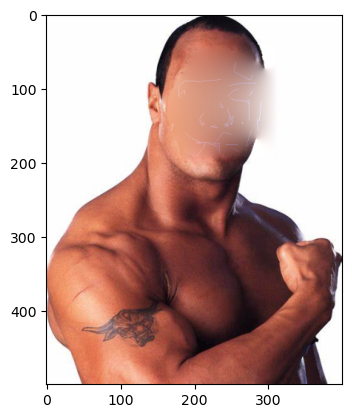

In [ ]:
plt.imshow(seamlessclone)

In [ ]:
img2_head_noface = cv.bitwise_and(img2, img2, mask=img2_face_mask)
result = cv.add(img2_head_noface, img2_new_face)

In [ ]:
triangulosImg2Marks

{127: [163.40707540512085, 93.8006266951561],
 34: [169.5646047592163, 94.87918019294739],
 139: [158.07974338531494, 105.65963387489319],
 11: [237.6178741455078, 168.45929622650146],
 0: [229.40599918365479, 172.24615812301636],
 37: [229.86583709716797, 169.17747259140015],
 232: [216.4306879043579, 112.3165488243103],
 231: [212.0039463043213, 113.82685601711273],
 120: [205.79280853271484, 125.92273950576782],
 72: [228.78363132476807, 174.41068589687347],
 39: [221.2515115737915, 158.45680236816406],
 128: [222.92993068695068, 115.32846093177795],
 121: [205.88421821594238, 120.28896063566208],
 47: [217.90063381195068, 125.52984058856964],
 104: [176.79075002670288, 75.81273466348648],
 69: [205.38537502288818, 80.75271546840668],
 67: [219.90509033203125, 73.12369346618652],
 175: [236.23247146606445, 213.96759152412415],
 171: [198.77102375030518, 199.55427944660187],
 148: [195.38757801055908, 206.70263469219208],
 118: [176.24908685684204, 119.17588859796524],
 50: [184.6240

In [ ]:
#def imagen_mask(imagen,landmask):
#    imagen_final = np.zeros(imagen.shape, dtype=np.uint8)
#    
#    for triangulo in triangles:
#        puntos = [landmask[punto] for punto in triangulo if punto in landmask]
#        if len(puntos) == 3:
#            # Crea una máscara con el mismo tamaño que la imagen
#            mascara = np.zeros(imagen.shape, dtype=np.uint8)
#    
#            # Dibuja el triángulo en la máscara
#            cv.drawContours(mascara, [np.array(puntos, dtype=np.int32)], -1, (255, 255, 255), -1)
#    
#            # Aplica la máscara a la imagen
#            triangulo_extraido = cv.bitwise_and(imagen, mascara)
#    
#            # Añade el triángulo extraído a la imagen final
#            imagen_final = cv.bitwise_or(imagen_final, triangulo_extraido)
#    return imagen_final

In [ ]:
#img_mask=imagen_mask(img,triangulosImg1Marks)
#img2_mask=imagen_mask(img2,triangulosImg2Marks)
points = np.float32(points)
points2 = np.float32(points2)
M = cv.getAffineTransform(points, points2)
warped_triangle = cv.warpAffine(cropped_triangle, M, (w, h))
warped_triangle = cv.bitwise_and(warped_triangle, warped_triangle, mask=cropped_tr2_mask)

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\arithm.cpp:230: error: (-215:Assertion failed) (mtype == CV_8U || mtype == CV_8S) && _mask.sameSize(*psrc1) in function 'cv::binary_op'


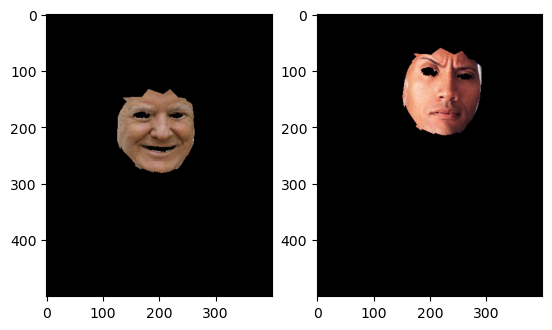

In [ ]:
fig, axs = plt.subplots(1,2)
axs[0].imshow(img_mask)
axs[1].imshow(img2_mask)

In [ ]:
channels = img2.shape
img2_new_face = np.zeros(img2.shape, dtype=np.uint8)
convexhull2 = cv.convexHull(points2)
convexhull2 = convexhull2.astype(int)
img2_face_mask = np.zeros_like(img2_gray)
img2_head_mask = cv.fillConvexPoly(img2_face_mask, convexhull2, 255)
img2_face_mask = cv.bitwise_not(img2_head_mask)
img2_head_noface = cv.bitwise_and(img2, img2, mask=img2_face_mask)
result = cv.add(img2_head_noface, img2_new_face)

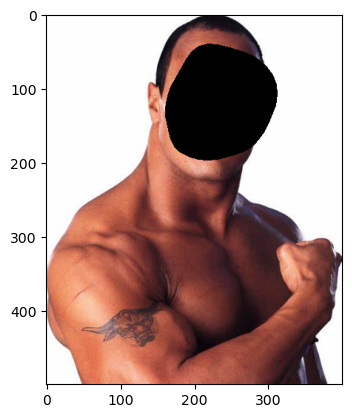

In [ ]:
plt.imshow(result)

In [ ]:
(x, y, w, h) = cv.boundingRect(convexhull2)
center_face2 = (int((x + x + w) / 2), int((y + y + h) / 2))
seamlessclone = cv.seamlessClone(result, img2, img2_head_mask, center_face2, cv.MIXED_CLONE)
plt.imshow(seamlessclone)

NameError: name 'img_head_mask' is not defined